In [127]:
import requests
from PIL import Image
from io import BytesIO
import networkx as nx
import matplotlib.pyplot as plt

In [128]:
class Graph:
    def __init__(self):
        self.graph = nx.Graph()

    def add_edge_unique(self, u, v):
        self.graph.add_edge(u, v)

    def add_edge(self, u, v):
        self.graph.add_edge(u, v)

    def get_neighbors(self, node):
        return list(self.graph.neighbors(node))

    def adjacency_list(self):
        adj_list = {}
        for node in self.graph.nodes:
            adj_list[node] = self.get_neighbors(node)
        return adj_list

In [129]:
def greedy_coloring(graph, color_order):
    # Sort nodes by degree in descending order
    nodes = sorted(graph.nodes(), key=lambda x: graph.degree(x), reverse=True)

    color_map = {}
    used_colors = set()

    for node in nodes:
        neighbors_colors = {color_map[neighbor] for neighbor in graph.neighbors(node) if neighbor in color_map}
        available_colors = set(color_order) - neighbors_colors

        if not available_colors:
            # All colors are used by neighbors, assign a new color
            color_map[node] = len(used_colors)
            used_colors.add(len(used_colors))
        else:
            # Assign the smallest available color
            color_map[node] = min(available_colors)

    return color_map

In [130]:
def draw_graph(g, color_map=None, node_positions=None, title=None):
    # Drawing the graph
    center_node = 'A'
    node_positions = {str(node): pos for node, pos in node_positions.items()}

    center_position = node_positions[center_node]
    adjusted_positions = {node: (x - center_position[0], y - center_position[1]) for node, (x, y) in node_positions.items()}

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img, extent=[-1, 2.5, -5, 5], aspect='auto', zorder=-1)

    # Draw edges
    nx.draw_networkx_edges(g.graph, adjusted_positions)

    # Draw nodes with colors
    if color_map:
        node_colors = [color_map[node] for node in g.graph.nodes]
        nx.draw_networkx_nodes(g.graph, adjusted_positions, node_size=500, node_color=node_colors, cmap=plt.cm.Blues)
    # Add node labels
    labels = {node: str(node) for node in g.graph.nodes}
    label_positions = {node: (x, y + 0.1) for node, (x, y) in adjusted_positions.items()}
    nx.draw_networkx_labels(g.graph, label_positions, labels, font_size=10)

    # Print BFS representation or greedy coloring information
    if title:
        print(title)
        if color_map:
            print("Node\tColor")
            for node, color in color_map.items():
                print(f"{node}\t{color}")
            print(f"Chromatic Number: {len(set(color_map.values()))}")
        else:
            bfs_edges = list(nx.bfs_edges(g.graph, source=center_node))
            bfs_representation = [f"{u}->{v}" for u, v in bfs_edges]
            print("BFS Representation:")
            for edge in bfs_representation:
                print(edge)

    # Hide axis
    ax.axis('off')

    # Show the plot
    plt.show()

Original Graph
BFS Representation:
A->B
A->C
A->N
A->K
A->G
A->E
A->H
B->D
B->F
C->L
N->I
H->M


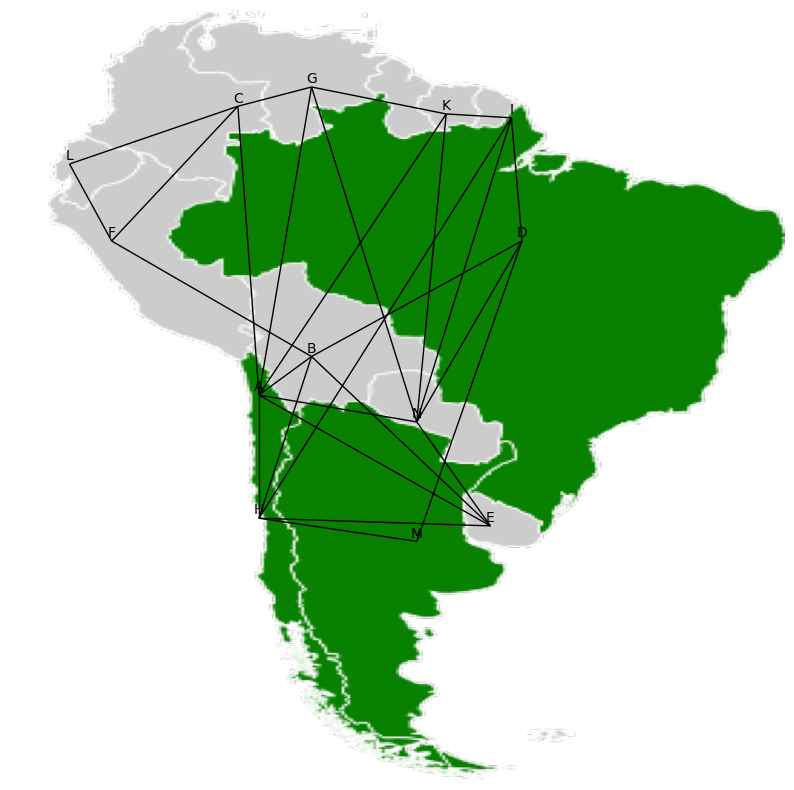

In [131]:
# Example usage:
edges = [
    ("A", "B"),
    ("A", "C"),
    ("B", "D"),
    ("A", "N"),
    ("B", "E"),
    ("B", "F"),
    ("C", "F"),
    ("C", "G"),
    ("H", "I"),
    ("K", "A"),
    ("K", "G"),
    ("M", "D"),
    ("M", "H"),
    ("H", "B"),
    ("D", "I"),
    ("K", "I"),
    ("C", "L"),
    ("G", "A"),
    ("F", "L"),
    ("N", "I"),
    ("N", "D"),
    ("N", "G"),
    ("N", "E"),
    ("A", "E"),
    ("N", "K"),
    ("A", "H"),
    ("H", "E")]

node_positions = {
    "A": (0, 0),
    "B": (0.25, 0.5),
    "C": (-0.1, 3.75),
    "D": (1.25, 2),
    "E": (1.1, -1.7),
    "F": (-0.7, 2),
    "G": (0.25, 4),
    "H": (0, -1.6),
    "I": (1.2, 3.6),
    "K": (0.89, 3.65),
    "L": (-0.9, 3),
    "M": (0.75, -1.9),
    "N": (0.75, -0.35)
}

color_order = ["Blue", "Brown", "Green", "Lavender", "Orange","Pink","Red","Yellow","Violet","Gold","Gray","Indigo","Silver"]

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/ABC_countries.svg/256px-ABC_countries.svg.png"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(image_url, headers=headers)
img = Image.open(BytesIO(response.content))

# Create the graph and set the positions
g = Graph()
for edge in edges:
    g.add_edge_unique(*edge)

draw_graph(g, node_positions=node_positions, title="Original Graph")

In [132]:
print("Adjacency List Representation:")
adj_list = g.adjacency_list()

for node, neighbors in adj_list.items():
    print(f"{node} -> {', '.join(neighbors)}")


Adjacency List Representation:
A -> B, C, N, K, G, E, H
B -> A, D, E, F, H
C -> A, F, G, L
D -> B, M, I, N
N -> A, I, D, G, E, K
E -> B, N, A, H
F -> B, C, L
G -> C, K, A, N
H -> I, M, B, A, E
I -> H, D, K, N
K -> A, G, I, N
M -> D, H
L -> C, F


Greedy Coloring (Specified Color Order)
Node	Color
A	Blue
N	Brown
B	Brown
H	Gold
C	Brown
D	Blue
E	Gray
G	Gold
I	Gray
K	Green
F	Blue
M	Brown
L	Gold
Chromatic Number: 5


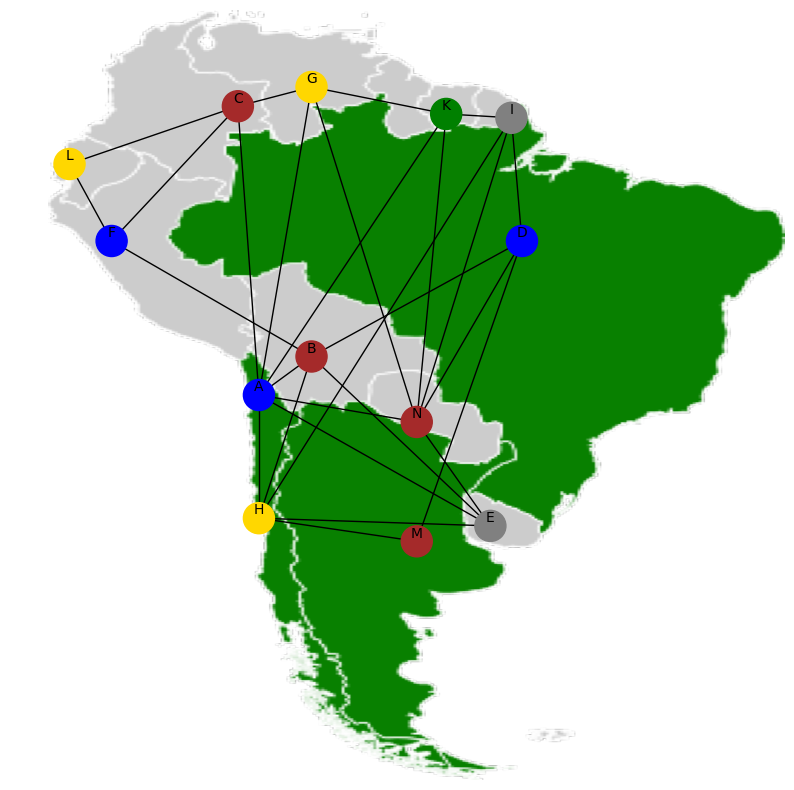

In [133]:
# Get the greedy coloring with the specified color order
greedy_color_map = greedy_coloring(g.graph, color_order)

draw_graph(g, color_map=greedy_color_map, node_positions=node_positions, title="Greedy Coloring (Specified Color Order)")

In [134]:
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge_unique(self, node, neighbor):
        if node not in self.graph:
            self.graph[node] = []
        if neighbor not in self.graph:
            self.graph[neighbor] = []
        if neighbor not in self.graph[node]:
            self.graph[node].append(neighbor)

def adjacency_matrix(graph):
    nodes = sorted(graph.keys())
    matrix = [[0] * (len(nodes) + 1) for _ in range(len(nodes) + 1)]

    # Set the first row and column as node names
    matrix[0][1:] = nodes
    for i in range(1, len(matrix)):
        matrix[i][0] = nodes[i - 1]

    node_index = {node: index for index, node in enumerate(nodes, start=1)}

    for node, neighbors in graph.items():
        for neighbor in neighbors:
            matrix[node_index[node]][node_index[neighbor]] = 1

    return matrix

# Assuming 'edges' is defined somewhere in your code

g = Graph()
for i in edges:
    g.add_edge_unique(*i)

adj_matrix = adjacency_matrix(g.graph)

# Print the adjacency matrix with row and column labels
print('Adjacency Matrix')
for row in adj_matrix:
    print(row)

Adjacency Matrix
[0, 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N']
['A', 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
['B', 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
['C', 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
['D', 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
['E', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['F', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
['G', 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['H', 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
['I', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['K', 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
['L', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['M', 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
['N', 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]


BFS Representation:
A->B
A->C
A->N
A->E
A->H
A->G
A->K
B->D
B->F
C->L
N->I
H->M


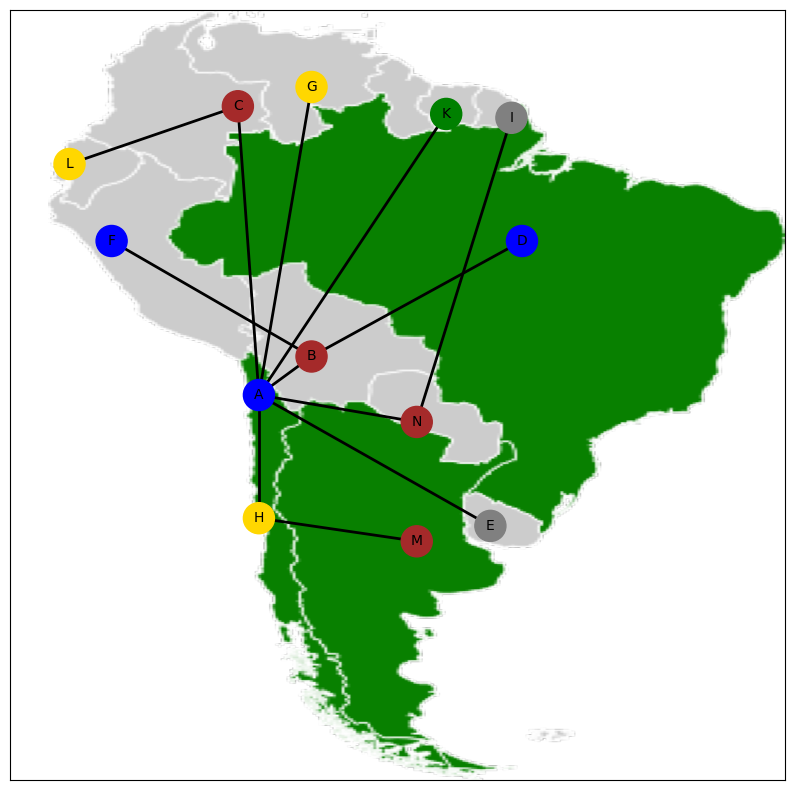

In [135]:
g = nx.Graph(g.graph)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=[-1, 2.5, -5, 5], aspect='auto', zorder=-1)

# Drawing the graph
center_node = 'A'
node_positions = {str(node): pos for node, pos in node_positions.items()}

center_position = node_positions[center_node]
adjusted_positions = {node: (x - center_position[0], y - center_position[1]) for node, (x, y) in node_positions.items()}

bfs_edges = list(nx.bfs_edges(g, source=center_node))

# Draw BFS edges
nx.draw_networkx_edges(g, adjusted_positions, edgelist=bfs_edges, edge_color='black', width=2)

# Draw nodes with colors
node_colors = [greedy_color_map.get(node, 'Blue') for node in g.nodes] if greedy_color_map else 'Blue'
nx.draw_networkx_nodes(g, adjusted_positions, node_size=500, node_color=node_colors, cmap=plt.cm.Blues)

# Add node labels
labels = {node: str(node) for node in g.nodes}
nx.draw_networkx_labels(g, node_positions, labels, font_size=10)

# Print BFS representation
bfs_representation = [f"{u}->{v}" for u, v in bfs_edges]
print("BFS Representation:")
for edge in bfs_representation:
    print(edge)

# Show the plot
plt.show()